In [1]:
from glob import glob
import pandas as pd

In [2]:
 glob('*.csv')

['exercise count.csv',
 'finaldata.csv',
 'fulldata(0223).csv',
 'fulldata_10_31_01_P_golf.csv',
 'fulldata_10_42_01_P_체력단련장업.CSV',
 'fulldata_운동센터(0223).csv',
 'fulldata_운동센터(0223)_2.csv',
 'number of person.csv',
 'population density.csv',
 'Seoulgreen Data.csv',
 'seoul_park.csv',
 '구면적, 인구밀도, 센터밀도.csv',
 '상관계수 구하기.csv',
 '서울시 관광 자연.csv',
 '서울시 주요 공원현황.csv',
 '서울시_연말정산데이터.csv',
 '서울시_인구데이터.csv',
 '서울시사업체수.csv',
 '서울시소득.csv',
 '연령대.csv',
 '인구밀도_20230222102711.csv']

# geojson 알아보기

In [ ]:
import json
import folium
import pandas as pd

In [ ]:
geo_path = 'seoul_si_gun_gu.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
geo_str

In [ ]:
# 공원데이터 불러오기
park = pd.read_csv('seoul_park.csv', encoding='utf-8')
park.head(2)

In [ ]:
park_p = pd.pivot_table(park, values = '공원명', index = '시군구명', columns = '분류', aggfunc = 'count')
# park_p = park_p.reset_index()
park_p.head(2)

In [ ]:
seoul_map = folium.Map(location=[37.5502, 126.982], xoom_start=10.5, titles='park in seoul')
seoul_map.choropleth(geo_data=geo_str,
                    data=park,
                    columns)

# 서울시 자치구별/ 연령대별 인원수 heatmap

- 구별/연령별 인원수를 구별 파이그래프로, 5x5줄로 그릴 것이다.
- 필요한 데이터 : `number of person.csv'
- 필요한 라이브러리 : `pandas`, `seaborn`, `matplotlib.pyplot`, `plotly`, `koreanize_matplotlib`
- 작업순서
1. 파일 불러오기
2. '시군구명'으로 오름차순 정렬
3. plot 그리기 (subplot 활용)
4. for 문을 사용해서 그리는 방법이 있는지 찾아보기

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import koreanize_matplotlib

In [4]:
#  1) 파일 불러오기
ages = pd.read_csv( 'number of person.csv', encoding='utf-8')

#  2) 파일 전처리하기 : 필요한 정보 (시군구명, 미성년~60대 이상)
ages1 = ages.drop(columns = ['Unnamed: 0', '인원수'])

#  3) '시군구명'으로 정렬하기
ages1 = ages1.sort_values('시군구명')

#  4) '시군구명'을 인덱스로 바꾸기
# ages1 = ages1.set_index('시군구명')

#  5) 행열 바꾸기
# ages1 = ages1.transpose()
ages1.head(4)

,시군구명,총인원수,미성년(0~19세),20~30대,40~50대,60대 이상
22,강남구,522783,92826,144297,175828,109838
24,강동구,457679,72268,128816,144383,112217
8,강북구,293602,33817,76500,92845,90446
15,강서구,567898,78272,181138,170710,137784


## 고령화 자치구 찾기
- 몸풀기로 각 자치구별 연령대 비율을 그려보고, 어느 자치구가 가장 고령화되었는지 살펴볼 예정이다.
- 고령화의 기준은 만65세 이상이지만 현재 데이터는 '60세 이상'을 한 그룹으로 묶어두었음을 고려할 필요가 있다.

In [28]:
age = ages.iloc[:, :8]
age = age.drop(columns = ['Unnamed: 0', '인원수'])
age.head(25)

,시군구명,총인원수,미성년(0~19세),20~30대,40~50대,60대 이상
0,종로구,140477,16851,41571,43994,38066
1,중구,119207,12456,37528,35799,33430
2,용산구,215891,26579,69432,66909,52977
3,성동구,280685,37340,88575,87039,67736
4,광진구,335713,41641,115111,101951,77015
5,동대문구,334024,41772,104500,99219,88536
6,중랑구,383496,45880,110084,120476,107061
7,성북구,426764,62554,122949,134767,106499
8,강북구,293602,33817,76500,92845,90446
9,도봉구,312180,40141,78813,99618,93613


In [29]:
age['미성년(0~19세)'] = round((ages['미성년(0~19세)']/ages['총인원수'])*100, 2)
age['20~30대'] = round((ages['20~30대']/ages['총인원수'])*100, 2)
age['40~50대'] = round((ages['40~50대']/ages['총인원수'])*100, 2)
age['60대 이상'] = round((ages['60대 이상']/ages['총인원수'])*100, 2)
age = age.drop(columns=['총인원수'])
age = age.sort_values('시군구명')
age = age.set_index(['시군구명'])
age

,미성년(0~19세),20~30대,40~50대,60대 이상
시군구명,,,,
강남구,17.76,27.60,33.63,21.01
강동구,15.79,28.15,31.55,24.52
강북구,11.52,26.06,31.62,30.81
강서구,13.78,31.90,30.06,24.26
관악구,9.45,40.35,26.82,23.37
광진구,12.40,34.29,30.37,22.94
구로구,13.71,29.01,30.85,26.43
금천구,10.89,32.18,30.23,26.70
노원구,15.67,25.95,32.80,25.57


Text(0.5, 0.98, '구별 연령별 인구 비율')

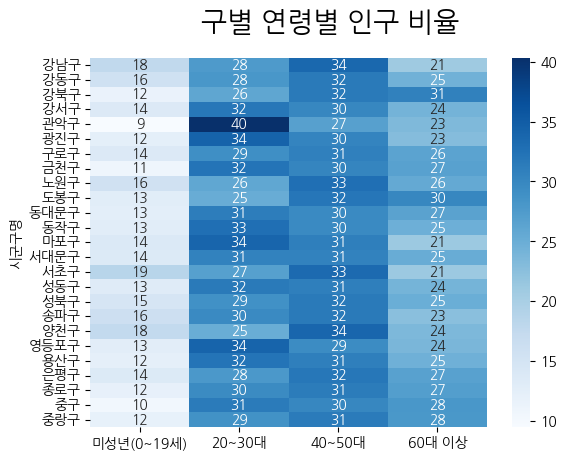

In [30]:
sns.heatmap(age, annot=True, fmt='.0f',cmap='Blues')
plt.suptitle('구별 연령별 인구 비율', size=20)

- 20-30대, 40-50대, 60대 이상 인구수의 비율은 대체로 비슷한 것으로 나왔다.
- 관악구는 20-30대 인구비율이 가장 높으며, 미성년자와 60대 이상의 인구비율은 적은 편이다.
- 60대 이상의 인구비율이 가장 낮은 자치구는 `마포구`, `서초구`, `강남구`로 나타났다.
- 반먼에 60대 이상 인구비율이 가장 높게 나온 자치구는 `강북구`였고, `도봉구`, `중구`, `중랑구`가 그 뒤를 잇는다.
- 큰 의미는 찾지 못했다.

## 연령대별 그래프 그리기

In [13]:
all = ages1.iloc[:,:2]
all = all.sort_values('총인원수', ascending=False)
all.head(3)

,시군구명,총인원수
23,송파구,652994
15,강서구,567898
22,강남구,522783


Text(0.5, 0.98, '60대 이상 인구수')

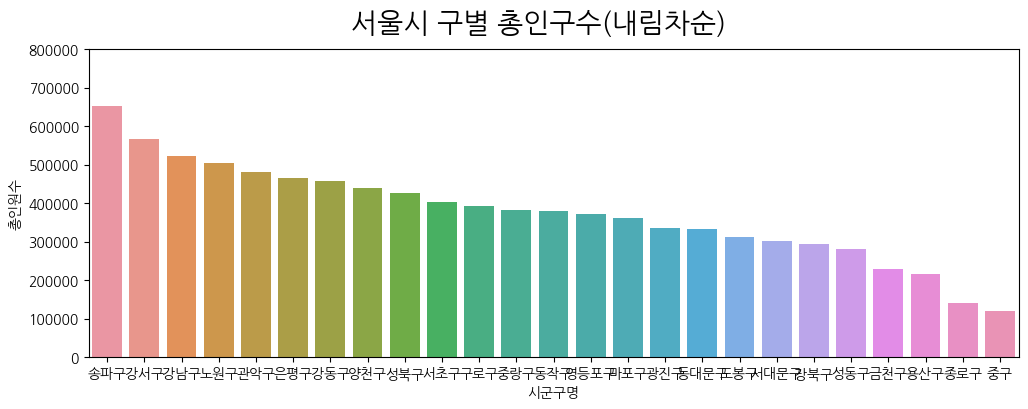

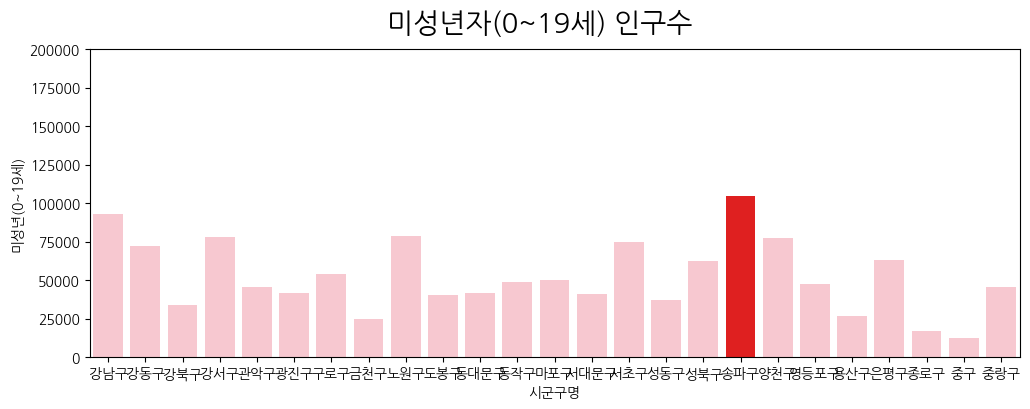

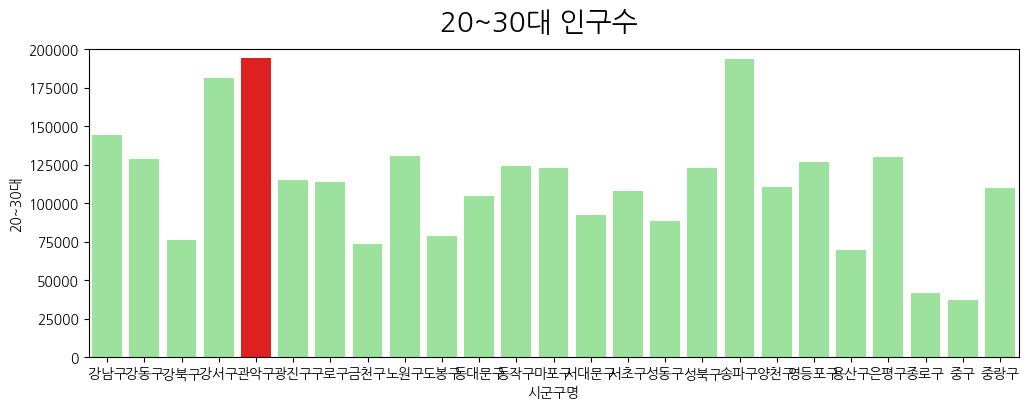

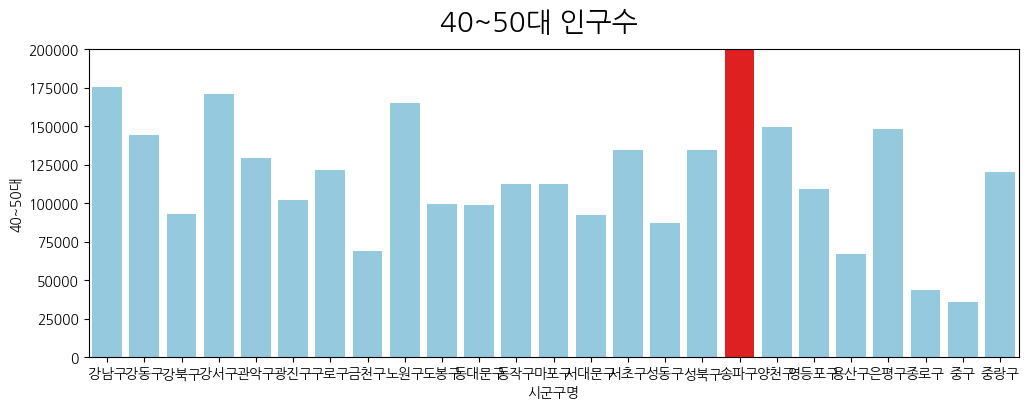

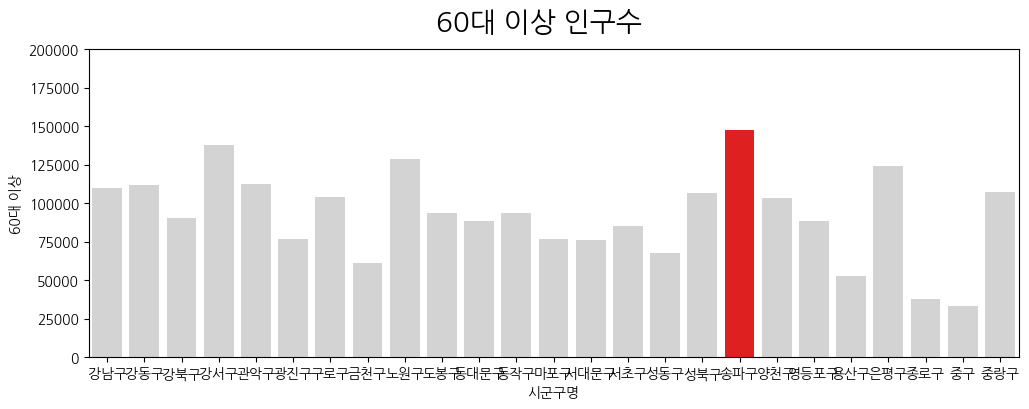

In [14]:
# clrs1 = ['lightgray' if (x < max(ages1['총인원수'])) else 'red' for x in ages1['총인원수']]
plt.figure(figsize=(12,4))
sns.barplot(data=all, x='시군구명', y='총인원수')
# sns.barplot(data=ages1, x='시군구명', y='총인원수', palette=clrs1)
plt.ylim(0, 800000)
plt.suptitle('서울시 구별 총인구수(내림차순)', size=20)

# 미성년자 차트
clrs = ['pink' if (x < max(ages1['미성년(0~19세)'])) else 'red' for x in ages1['미성년(0~19세)']]
plt.figure(figsize=(12,4))
sns.barplot(data=ages1, x='시군구명', y='미성년(0~19세)', palette=clrs)
plt.ylim(0, 200000)
plt.suptitle('미성년자(0~19세) 인구수', size=20)

# 20~30대 차트
clrs2 = ['lightgreen' if (x < max(ages1['20~30대'])) else 'red' for x in ages1['20~30대']]
plt.figure(figsize=(12,4))
sns.barplot(data=ages1, x='시군구명', y='20~30대', palette=clrs2)
plt.ylim(0, 200000)
plt.suptitle('20~30대 인구수', size=20)

# 40~50대 차트
clrs3 = ['skyblue' if (x < max(ages1['40~50대'])) else 'red' for x in ages1['40~50대']]
plt.figure(figsize=(12,4))
sns.barplot(data=ages1, x='시군구명', y='40~50대', palette=clrs3)
plt.ylim(0, 200000)
plt.suptitle('40~50대 인구수', size=20)

# 60대 이상 차트
clrs4 = ['lightgray' if (x < max(ages1['60대 이상'])) else 'red' for x in ages1['60대 이상']]
plt.figure(figsize=(12,4))
sns.barplot(data=ages1, x='시군구명', y='60대 이상', palette=clrs4)
plt.ylim(0, 200000)
plt.suptitle('60대 이상 인구수', size=20)


- 총인구수는 `송파구`, `강서구`, `강남구` 순으로 가장 많으며, `중구`가 가장 적은 인구수를 보인다.
- 가장 많은 인구수를 가진 `송파구`와 가장 적은 인구수를 가진 `중구`의 차이는 약 6배.
- 그러나 20~30대가 가장 많은 자치구는 `관악구`이다.
- 그렇다면 `관악구`에 20~30대가 선호하는 운동종목의 센터가 많을까?

In [ ]:
# fig, ax = plt.subplots(4,1, figsize=(12,12), sharey=True)
# plt.subplots_adjust(bottom=0.1, top=0.9, wspace=0.2, hspace=.3)
# clrs = ['red' if (x < max(ages1['미성년(0~19세)'])) else 'pink' for x in ages1['미성년(0~19세)']]

# ax[0].bar(ages1['시군구명'],ages1['미성년(0~19세)'], palette=clrs)
# ax[0].set_title("서울시 구별 '미성년자(0~19)' 수")
# ax[1].bar(ages1['시군구명'],ages1['20~30대'], color='lightgreen')
# ax[1].set_title("서울시 구별 '20~30대' 수")
# ax[2].bar(ages1['시군구명'],ages1['40~50대'], color='skyblue')
# ax[2].set_title("서울시 구별 '40~50대' 수")
# ax[3].bar(ages1['시군구명'],ages1['60대 이상'], color='lightgray')
# ax[3].set_title("서울시 구별 '60대 이상' 수")

# 연령대와 운동센터의 연관성
- 가설 : 20~30대가 많은 관악구에는 '필라테스' 업체 수가 많을 것이다. (=비율이 높을 것이다)
- 그저 '업체 수'로만 비교하면 안됨. 
- (유동인구를 고려하지 않았기 때문에 '필라테스/전체센터 수'의 비율로 확인해볼 것이다)

In [15]:
# 데이터 불러오기
ex = pd.read_csv('exercise count.csv', encoding='utf-8')
ex = ex.sort_values('시군구명')
ex = ex.set_index(['시군구명'])
ex.head(3)

,골프연습장,크로스핏,테니스,풋살장,필라테스,헬스장,총센터수
시군구명,,,,,,,
강남구,326.0,10.0,18.0,1.0,167.0,297.0,819.0
강동구,63.0,3.0,6.0,0.0,35.0,73.0,180.0
강북구,14.0,0.0,2.0,0.0,23.0,40.0,79.0


In [16]:
ex['골프연습장'] = round((ex['골프연습장']/ex['총센터수'])*100, 2)
ex['크로스핏'] = round((ex['크로스핏']/ex['총센터수'])*100, 2)
ex['테니스'] = round((ex['테니스']/ex['총센터수'])*100, 2)
ex['풋살장'] = round((ex['풋살장']/ex['총센터수'])*100, 2)
ex['필라테스'] = round((ex['필라테스']/ex['총센터수'])*100, 2)
ex['헬스장'] = round((ex['헬스장']/ex['총센터수'])*100, 2)
ex['총센터수'] = ex['골프연습장']+ex['크로스핏']+ex['테니스']+ex['풋살장']+ex['필라테스']+ex['헬스장']
ex.head()

,골프연습장,크로스핏,테니스,풋살장,필라테스,헬스장,총센터수
시군구명,,,,,,,
강남구,39.80,1.22,2.20,0.12,20.39,36.26,99.99
강동구,35.00,1.67,3.33,0.00,19.44,40.56,100.00
강북구,17.72,0.00,2.53,0.00,29.11,50.63,99.99
강서구,20.22,1.40,3.09,0.00,26.97,48.31,99.99
관악구,20.29,1.45,2.42,0.00,18.36,57.49,100.01


In [17]:
ex1 = ex.iloc[:,:-1]
ex1 = ex1.sort_values('필라테스', ascending=False)

<AxesSubplot:ylabel='시군구명'>

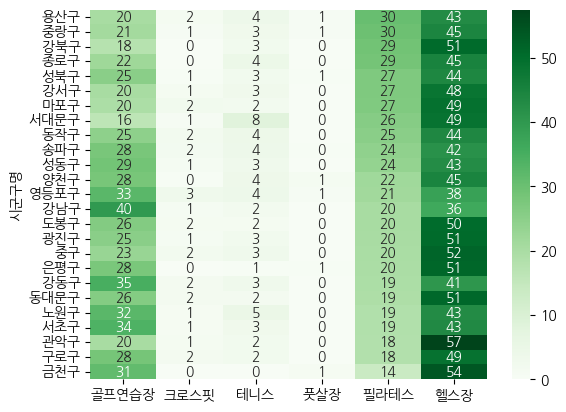

In [18]:
sns.heatmap(ex1, annot=True, fmt='.0f',cmap='Greens')

- 20~30대 수와 필라테스 센터의 비율은 전혀 상관이 없었다.
- 관악구에는 필라테스보다 골프연습장의 수가 더 많았다.
- 전체적으로 인구의 연령대와 센터의 관계에 의미가 없었다.

< 갑자기 궁금해진 점 ! > : 골프연습장이 많은 자치구는 어떤 공통점을 가지고 있을까?
- 귀무가설 : 골프장 개수는 각 자치구의 면적, 평균소득과 관련이 없다. 
- p-value < 0.05 시, 귀무가설 기각.

# 골프연습장이 많은 지역

In [26]:
# 1) 골프장 개수 순으로 정렬해서 그래프 그려보기

golf = pd.read_csv('exercise count.csv', encoding='utf-8')
golf = golf.set_index('시군구명')
golf = golf.iloc[:,:1]
golf.sort_values('골프연습장', ascending=False).head(3)

,골프연습장
시군구명,
강남구,326.0
서초구,156.0
송파구,123.0


- 골프연습장이 가장 많은 자치구 : 강남구 (2위와 약 2배 차이가 남)
- top3 : `강남구`, `서초구`, `송파구`
- 골프연습장 창업시 고려할 점 : 상권특성, 유동인구 정보, 경쟁점 확인
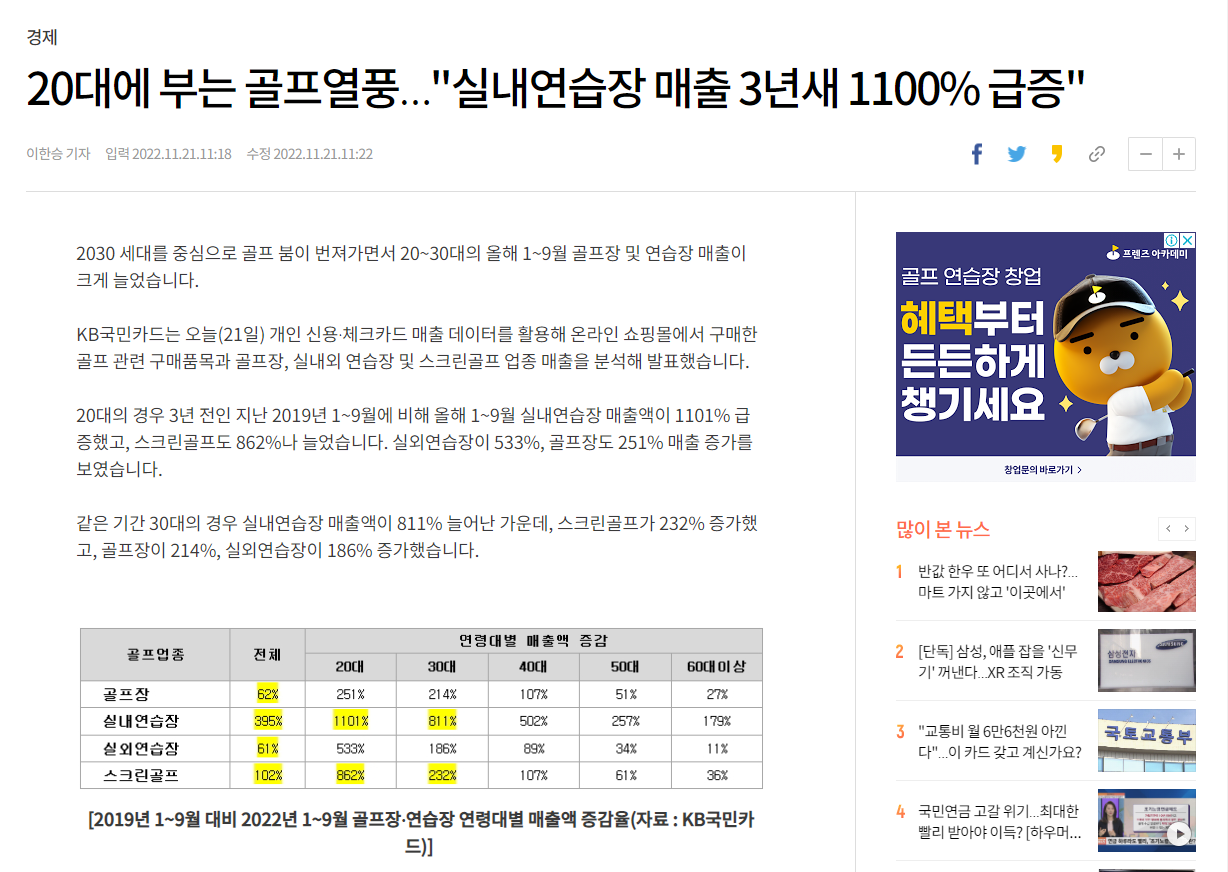
- 20-30대 골프인구의 증가
- 그렇다면 골프연습장이 많은 강남구, 서초구, 송파구에는 20-30대 인구가 많을까?
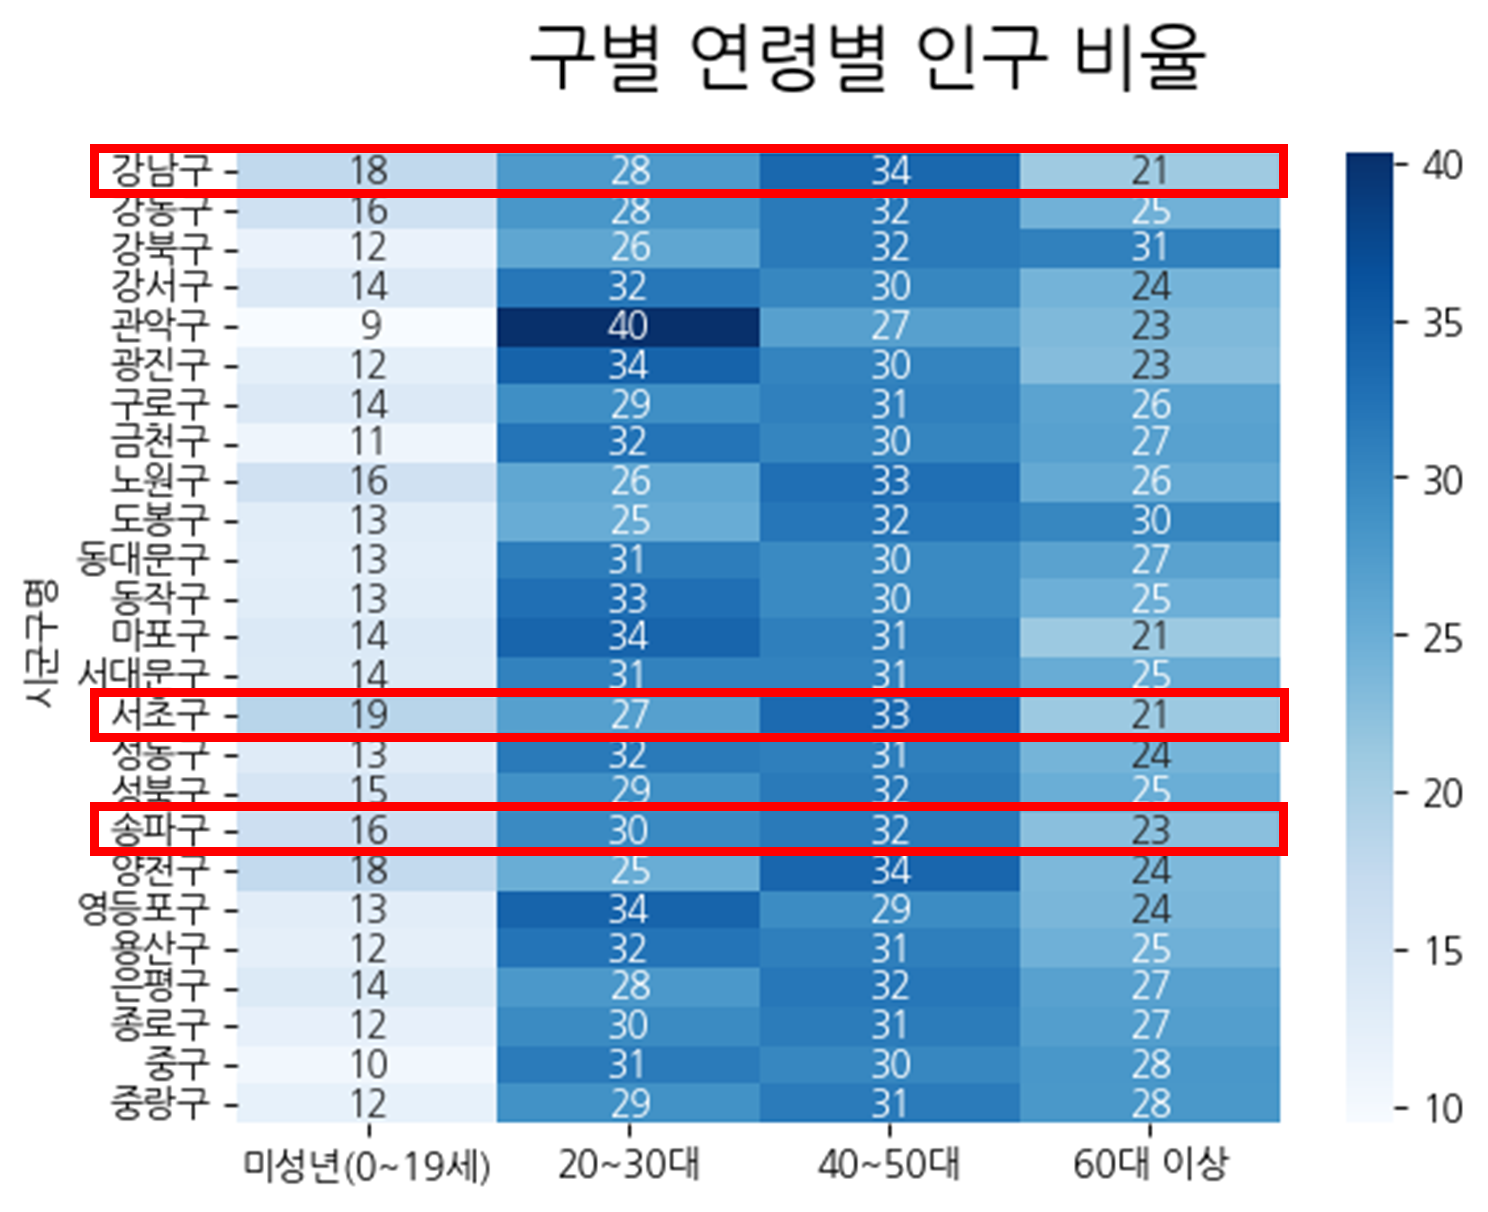
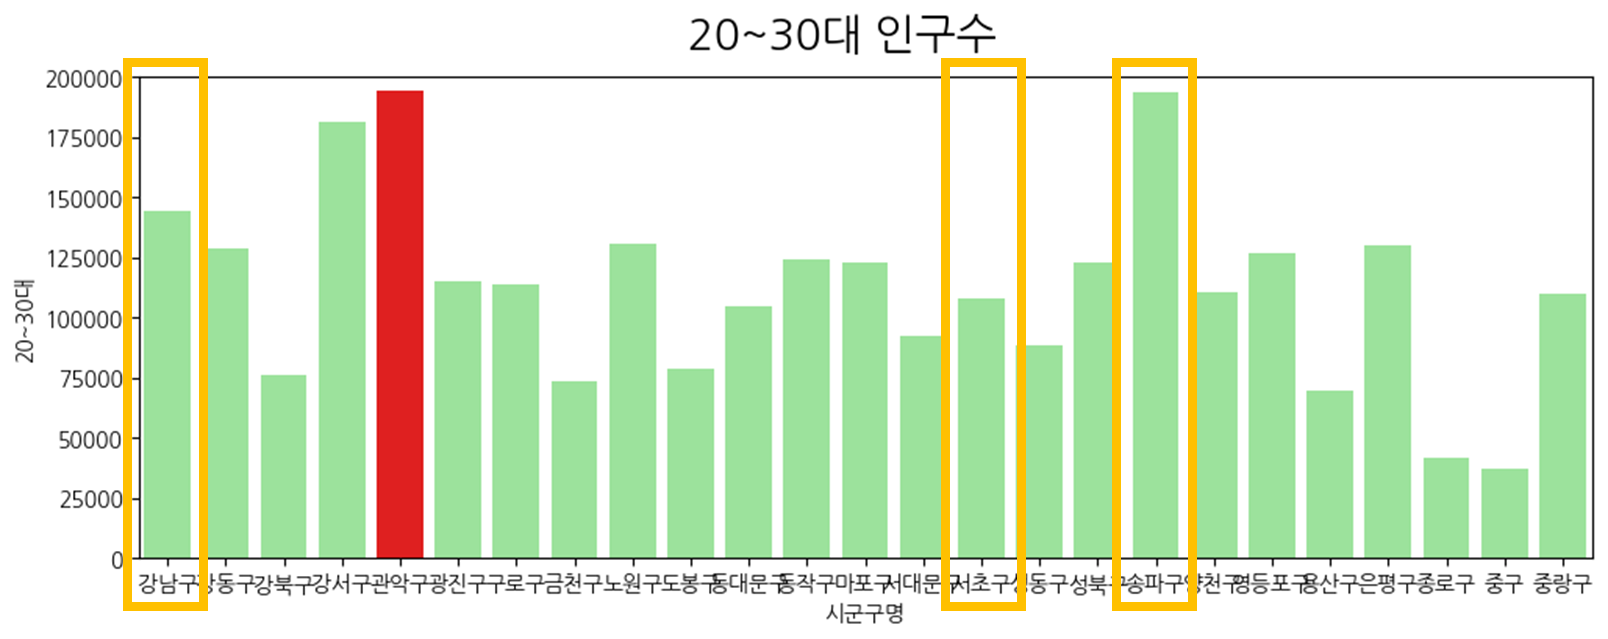